# Interpolacion

<table style = "border: 1px solid; font-size: = 15px; text-align:center;">
    <tr style = "border: 1px solid">
        <th style = "border: 1px solid"><strong style = "bold">x</strong></th>
        <th style = "border: 1px solid; text-align:center;"><i>1</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>2</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>3</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>4</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>5</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>6</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>7</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>8</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>9</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>10</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>11</i></th>
    </tr>
    <tr>
        <th style = "border: 1px solid"><strong>y</strong></th>
        <th style = "border: 1px solid"><i>-0, 5</i></th>
        <th style = "border: 1px solid"><i>0,26873</i></th>
        <th style = "border: 1px solid"><i>0,70424</i></th>
        <th style = "border: 1px solid"><i>1,00412</i></th>
        <th style = "border: 1px solid"><i>1,23127</i></th>
        <th style = "border: 1px solid"><i>1,23127</i></th>
        <th style = "border: 1px solid"><i>?</i></th>
        <th style = "border: 1px solid"><i>0,70424</i></th>
        <th style = "border: 1px solid"><i>0</i></th>
        <th style = "border: 1px solid"><i>-0,5</i></th>
        <th style = "border: 1px solid"><i>0</i></th>
    </tr>
</table>

###### Ajuste a un polinomio de interpolación los datos dados, empleando cada uno de los siguientes métodos:
* Newton
* Lagrange
* Trazadores cúbicos

- Con el polinomio encontrado, determine el valor en $𝑥=7$

#### Newton

La fórmula general para un polinomio de n-ésimo grado es: $$f(x)=a_0+a_{1x}+a_{2x}^2+...+a_n^n$$

fórmula para calcular valores intermedios.(Canale 2007), La forma más simple de interpolación consiste en unir dos puntos con una línea recta.para ello se usa la siguiente fiormula: $$f_1(x)=f(x_0)+\frac{fx_1-fx_0}{x_1-x_0}(x-x_0)$$

Donde $x$ es un punto entre $x_0$ y $x_1$ que queremos encontrar

El análisis anterior puede generalizarse para ajustar un polinomio de n-ésimo grado a n+1 datos. El polinomio de n-ésimo grado es: $$f_n(x) = b_0 + b_1(x – x_0) + · · · + b_n(x – x_0)(x – x_1)· · ·(x – x_{n–1})$$ 

Usamos estos datos y las siguientes ecuaciones para evaluar los coeficientes:

$$b_0 = f(x_0)
$$ $$b_1 =  f[x_1, x_0]$$
$$b_2 =  f[x_2, x_1, x_0]$$
$$b_n =  f[x_n, x_{n-1},...x_1,x_0]$$


la primera diferencia dividida finita en forma general se representa como:
$$f[x_i,x_j]=\frac{fx_i-fx_j}{x_i-x_j}$$

segunda diferencia dividida finita, que representa la diferencia de las dos primeras diferencias divididas, se expresa en forma general como:
$$f[x_i,x_j, x_k]=\frac{f[x_i,x_j]-f[x_j,x_k]}{x_i-x_k}$$

Estas diferencias sirven para evaluar los coeficientes en las ecuaciones $b_0$ a $b_n$, los cuales se sustituirán en la ecuación $f_n(x) = b_0 + b_1(x – x_0) + · · · + b_n(x – x_0)(x – x_1)· · ·(x – x_{n–1})$  polinomio de interpolación de Newton en diferencias divididas.(Canale 2007)

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
x1= [1,2,3,4,5,6,8,9,10,11]
y2= [-0.5,0.26873,0.70424, 1.00412, 1.23127, 1.23127, 0.70424,0,-0.5,0]
xi=7
n=len(x1)

In [33]:
def NewtInt (x, y, n, xi):
    
    fdd=[[None for x in range(n)] for x in range (n)]
    yint=[None for x in range(n)]
    ea=[None for x in range(n)]
         
    for i in range(n):
        fdd[i][0]=y[i]
              
    print("#i \t x_i \t f(x_i) \t diferencia")     
    for j in range(1,n):
        for i in range(n-j):
            fdd[i][j] = (fdd[i+1][j-1]-fdd[i][j-1])/(x[i+j]-x[i])
            print ("{0} \t{1} \t{2:.5f} \t{3:.5f}".format(i,x[i],y[i],fdd[i][j]))
    xterm = 1
    yint[0]=fdd[0][0]
         
    for order in range(1,n):
        xterm = xterm * (xi-x[order-1])
        yint2 = yint[order-1] + fdd[0][order] * xterm
        ea[order-1] = yint2-yint[order-1]
        yint[order] = yint2
        
    #print(ea[order-1])
    return yint[order], ea[order-1]

In [34]:
yi,ea=(NewtInt(x1, y2, n, xi))

#i 	 x_i 	 f(x_i) 	 diferencia
0 	1 	-0.50000 	0.76873
1 	2 	0.26873 	0.43551
2 	3 	0.70424 	0.29988
3 	4 	1.00412 	0.22715
4 	5 	1.23127 	0.00000
5 	6 	1.23127 	-0.26352
6 	8 	0.70424 	-0.70424
7 	9 	0.00000 	-0.50000
8 	10 	-0.50000 	0.50000
0 	1 	-0.50000 	-0.16661
1 	2 	0.26873 	-0.06782
2 	3 	0.70424 	-0.03636
3 	4 	1.00412 	-0.11358
4 	5 	1.23127 	-0.08784
5 	6 	1.23127 	-0.14691
6 	8 	0.70424 	0.10212
7 	9 	0.00000 	0.50000
0 	1 	-0.50000 	0.03293
1 	2 	0.26873 	0.01048
2 	3 	0.70424 	-0.02574
3 	4 	1.00412 	0.00643
4 	5 	1.23127 	-0.01477
5 	6 	1.23127 	0.06226
6 	8 	0.70424 	0.13263
0 	1 	-0.50000 	-0.00561
1 	2 	0.26873 	-0.00906
2 	3 	0.70424 	0.00643
3 	4 	1.00412 	-0.00424
4 	5 	1.23127 	0.01540
5 	6 	1.23127 	0.01407
0 	1 	-0.50000 	-0.00069
1 	2 	0.26873 	0.00258
2 	3 	0.70424 	-0.00178
3 	4 	1.00412 	0.00327
4 	5 	1.23127 	-0.00022
0 	1 	-0.50000 	0.00047
1 	2 	0.26873 	-0.00062
2 	3 	0.70424 	0.00072
3 	4 	1.00412 	-0.00050
0 	1 	-0.50000 	-0.00014
1 	2 	0.26873 	0.000

Con el polinomio encontrado, determine el valor en 𝑥 = 7

In [38]:
print("el valor de x=7 es f(x)=",round(yi,5))

el valor de x=7 es f(x)= 1.06292


In [39]:
print("el valor del error es",ea)

el valor del error es 0.03000673809523824


Como podemos ver ya tenemos todas las y correspondientes

<table style = "border: 1px solid; font-size: = 15px; text-align:center;">
    <tr style = "border: 1px solid">
        <th style = "border: 1px solid"><strong style = "bold">x</strong></th>
        <th style = "border: 1px solid; text-align:center;"><i>1</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>2</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>3</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>4</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>5</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>6</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>7</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>8</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>9</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>10</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>11</i></th>
    </tr>
    <tr>
        <th style = "border: 1px solid"><strong>y</strong></th>
        <th style = "border: 1px solid"><i>-0,5</i></th>
        <th style = "border: 1px solid"><i>0,26873</i></th>
        <th style = "border: 1px solid"><i>0,70424</i></th>
        <th style = "border: 1px solid"><i>1,00412</i></th>
        <th style = "border: 1px solid"><i>1,23127</i></th>
        <th style = "border: 1px solid"><i>1,23127</i></th>
        <th style = "border: 1px solid"><i>1.06292</i></th>
        <th style = "border: 1px solid"><i>0,70424</i></th>
        <th style = "border: 1px solid"><i>0</i></th>
        <th style = "border: 1px solid"><i>-0,5</i></th>
        <th style = "border: 1px solid"><i>0</i></th>
    </tr>
</table>

In [45]:
x2= [1,2,3,4,5,6,7,8,9,10,11]
y3= [-0.5,0.26873,0.70424, 1.00412, 1.23127, 1.23127,1.06292, 0.70424,0,-0.5, 0]

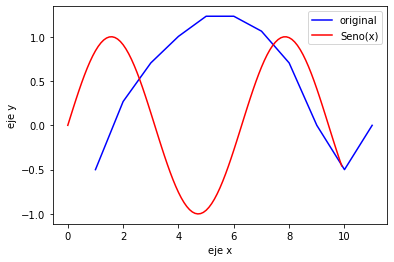

In [46]:
import numpy as np
import matplotlib.pyplot as plt

plt.xlabel("eje x")
plt.ylabel("eje y")

plt.plot(x2,y3,"blue", label="original")
plt.legend()

t = np.arange(0.0, 10.0, 0.10)
s = np.sin(t)

plt.plot(t,s,"red", label="Seno(x)")
plt.legend()


plt.show()

x=7 es en realidad seno(7).

$$f_n(x)=\sum_{i=0}^n L_i(x)f(x_i)$$

donde

$$L_i(x)=\prod_{j=n,j\neq i}^n \frac{x-x_j}{x_i-x_j}$$

donde $\prod$ designa el “producto de”.(chapra 2007)

In [57]:
def Lagrng(x1, y2, n,xi):
    sum = 0
    for i in range(n):
        product = y2[i]
        for j in range(n):
            if i != j:
                product = product*(xi-x1[j])/(x1[i]-x1[j])
        sum = sum + product
    #Lagrng = sum
    return sum

In [58]:
yi1=(Lagrng(x1, y2, n,xi))

In [59]:
print("el valor de x=7 es f(x)=",yi1)

el valor de x=7 es f(x)= 1.06292


## Trazadores cúbicos

$$f_i(x)=a_ix^3+b_ix^2+c_ix+d_i$$


 Las incógnitas se evalúan empleando la siguiente ecuación

$$(x_i-x_{i-1})f''(x_{i-1})+2(x_{i+1}-x_{i-1})f''(x_i)+(x_{i+1}-x_i)f''(x_{i+1})$$\\
$$=\frac{6}{x_{i+1}-x_{i}}[f(x_{i+1})-f(x_i)]+\frac{6}{x_{i}-x_{i-1}}[f(x_{i-1})-f(x_i)]$$

In [61]:
def traza(x,y):
    h = np.zeros(n-1, dtype = float)
    
    for j in range(n-1):
        h[j] = x[j+1] - x[j]
    
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((y[2]-y[1])/h[1] - (y[1]-y[0])/h[0])

    for i in range(1,n-3):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (y[i+2]-y[i+1])/h[i+1]
        factor10 = (y[i+1]-y[i])/h[i]
        B[i] = 6*(factor21 - factor10)
        
    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (y[n-1]-y[n-2])/h[n-2]
    factor23 = (y[n-2]-y[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)
    

    r = np.linalg.solve(A,B)
    for j in range(1,n-1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0
    

    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    
    for j in range(n-1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (y[j+1]-y[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = y[j]

    tabla1 = []
    for j in range(n-1):
        tramo = a[j]*(x1[j+1]-x1[j])**3 + b[j]*(x1[j+1]-x1[j])**2
        tramo = tramo + c[j]*(x1[j+1]-x1[j])+ d[j]
        tabla1.append(tramo)
    return(tabla1)

In [66]:
tabla1 = traza(x1,y2)

print("tramos:")
for i in range(1,n):
    print(i, ' x = ['+str(x1[i-1])+','+str(x1[i])+']', '   ',str(tabla1[i-1]))
     

tramos:
1  x = [1,2]     0.26873
2  x = [2,3]     0.70424
3  x = [3,4]     1.00412
4  x = [4,5]     1.23127
5  x = [5,6]     1.23127
6  x = [6,7]     1.06292
7  x = [7,8]     0.70424
8  x = [8,9]     0.0
9  x = [9,10]     -0.5


In [68]:
print("El valor en el tramo donde se encuentra el valor x=7 es: ",tabla1[xi-1])

El valor en el tramo donde se encuentra el valor x=7 es:  0.70424


<table style = "border: 1px solid; font-size: = 15px; text-align:center;">
    <tr style = "border: 1px solid">
        <th style = "border: 1px solid"><strong style = "bold">x</strong></th>
        <th style = "border: 1px solid; text-align:center;"><i>1</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>2</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>3</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>4</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>5</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>6</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>7</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>8</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>9</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>10</i></th>
        <th style = "border: 1px solid; text-align:center;"><i>11</i></th>
    </tr>
    <tr>
        <th style = "border: 1px solid"><strong>y</strong></th>
        <th style = "border: 1px solid"><i>-0, 5</i></th>
        <th style = "border: 1px solid"><i>0,26873</i></th>
        <th style = "border: 1px solid"><i>0,70424</i></th>
        <th style = "border: 1px solid"><i>1,00412</i></th>
        <th style = "border: 1px solid"><i>1,23127</i></th>
        <th style = "border: 1px solid"><i>1,23127</i></th>
        <th style = "border: 1px solid"><i>0.70424</i></th>
        <th style = "border: 1px solid"><i>0,70424</i></th>
        <th style = "border: 1px solid"><i>0</i></th>
        <th style = "border: 1px solid"><i>-0,5</i></th>
        <th style = "border: 1px solid"><i>0</i></th>
    </tr>
</table>

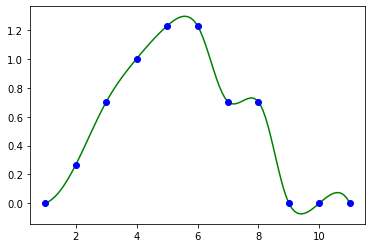

In [93]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import interpolate 
points = [(1,0.0005),(2,0.26873),(3,0.70424),(4,1.00412),(5,1.23127),(6,1.23127),(7,0.70424)] 
points = points + [(8,0.70424),(9,0),(10,0.0005),(11,0)] 
data = np.array(points) 
tck,u = interpolate.splprep(data.transpose(), s=0) 
unew = np.arange(0, 1.01, 0.01) 
out = interpolate.splev(unew, tck) 
plt.figure() 
plt.plot(out[0], out[1], color='g') 
plt.plot(data[:,0], data[:,1], 'ob') 
plt.show()